# GITHUB

https://github.com/Vladimirjon/MetodosNumericos_PasquelJohann/tree/main/Tarea09

# CONJUNTO DE EJERCICIOS 

### 1. Para cada uno de los siguientes sistemas lineales.
*Obtenga, de ser posible, una solución con métodos gráficos. Explique los resultados desde un punto de vista geométrico.*

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


def graficar_sistema_general(coeficientes, independientes):
    """
    Grafica un sistema de ecuaciones lineales en 2D, 3D o resuelve algebraicamente para dimensiones mayores.
    
    Args:
        coeficientes: Lista de listas con los coeficientes de las ecuaciones.
        independientes: Lista de los términos independientes.
    """
    num_ecuaciones = len(coeficientes)
    num_incognitas = len(coeficientes[0])
    
    # Caso 2 incógnitas (2D)
    if num_incognitas == 2:
        x = np.linspace(-10, 10, 400)
        plt.figure(figsize=(8, 6))
        
        for i, (a, b) in enumerate(coeficientes):
            y = (independientes[i] - a * x) / b
            plt.plot(x, y, label=f'Ecuación {i + 1}: {a}x + {b}y = {independientes[i]}')
        
        try:
            A = np.array(coeficientes)
            B = np.array(independientes)
            solucion = np.linalg.solve(A, B)
            plt.scatter(solucion[0], solucion[1], color='red', label=f'Solución: {solucion}')
        except np.linalg.LinAlgError:
            plt.title("No hay solución única (sistema dependiente o incompatible)")
        
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Sistema de ecuaciones en 2D')
        plt.show()
    
    # Caso 3 incógnitas (3D)
    elif num_incognitas == 3:
        x = np.linspace(-10, 10, 20)
        y = np.linspace(-10, 10, 20)
        X, Y = np.meshgrid(x, y)
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        for i, (a, b, c) in enumerate(coeficientes):
            Z = (independientes[i] - a * X - b * Y) / c
            ax.plot_surface(X, Y, Z, alpha=0.5, label=f'Ecuación {i + 1}')
        
        try:
            A = np.array(coeficientes)
            B = np.array(independientes)
            solucion = np.linalg.solve(A, B)
            ax.scatter(solucion[0], solucion[1], solucion[2], color='red', label=f'Solución: {solucion}')
        except np.linalg.LinAlgError:
            ax.set_title("No hay solución única (sistema dependiente o incompatible)")
        
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        plt.title('Sistema de ecuaciones en 3D')
        plt.legend()
        plt.show()
    
    # Caso más de 3 incógnitas
    else:
        try:
            A = np.array(coeficientes)
            B = np.array(independientes)
            solucion = np.linalg.solve(A, B)
            print(f"El sistema tiene solución única: {solucion}")
        except np.linalg.LinAlgError:
            print("No hay solución única para este sistema (puede ser dependiente o incompatible).")

**a.**

$x_1 + 2x_2 = 0,$

$x_1 - x_2 = 0.$

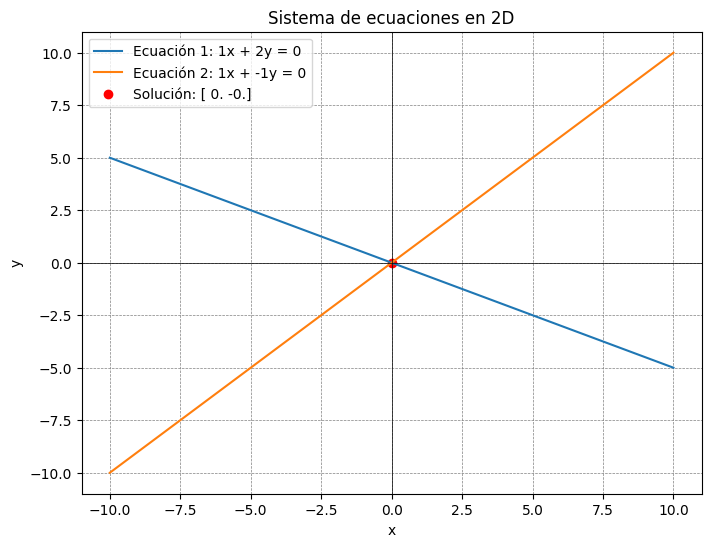

In [11]:
coeficientes = [[1, 2], [1, -1]]
independientes = [0, 0]
graficar_sistema_general(coeficientes, independientes)

El sistema de ecuaciones está formado por dos rectas en el plano, la primera recta tiene pendiente negativa y pasa por el origen, mientras que la segunda tiene pendiente positiva y también cruza el origen.

Ambas rectas se intersectan en el punto $(0,0)$ **(solución única)**

**b.** 

$x_1 + 2x_2 = 3$

$-2x_1 - 4x_2 = 6$


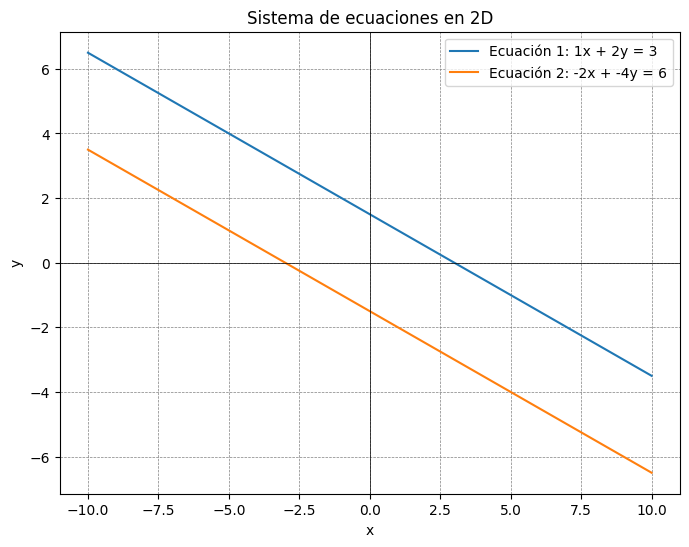

In [10]:
coeficientes = [[1, 2], [-2, -4]]
independientes = [3, 6]
graficar_sistema_general(coeficientes, independientes)

Vemos que las dos líneas son paralelas, ya que tienen la misma inclinación pero diferentes interceptos en el eje y.

Estas líneas nunca se intersectan, lo que indica que **el sistema no tiene solución**.

**c.**

$2x_1 + x_2 = -1$

$x_1 + x_2 = 2$

$x_1 -3x_2 =5.$

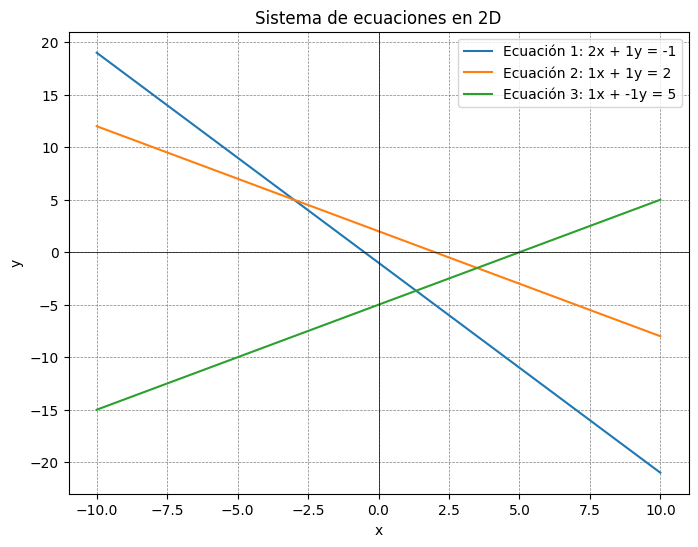

In [9]:
coeficientes = [[2, 1], [1, 1], [1, -1]]
independientes = [-1, 2, 5]
graficar_sistema_general(coeficientes, independientes)

Geométricamente, **este sistema es incompatible**, ya que las tres líneas no tienen un único punto de intersección común. Esto implica que no existe una solución que satisfaga simultáneamente las tres ecuaciones.

**d.**

$2x_1 + x_2 + x_3 = 1, $

$2x_1 + 4x_2 - x_3 = -1.$


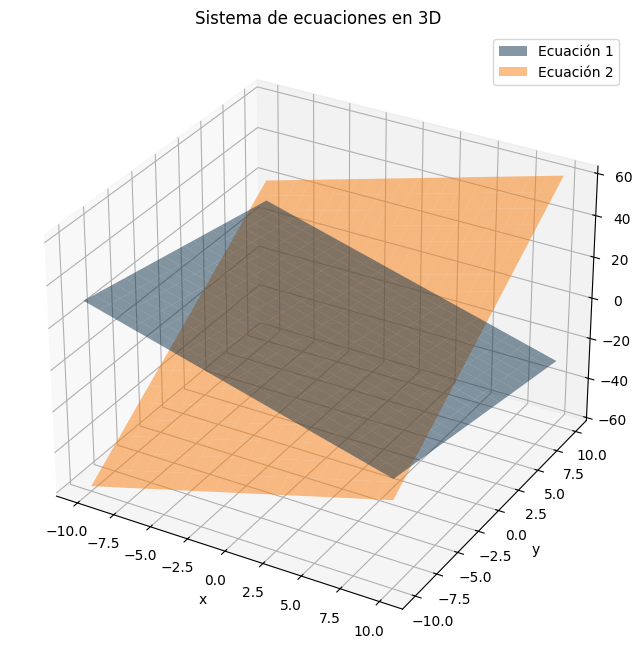

In [8]:
coeficientes = [[2, 1, 1], [2, 4, -1]]
independientes = [1, -1]
graficar_sistema_general(coeficientes, independientes)

Al graficarlos, observamos que los planos no son paralelos, por lo que tienen una intersección. En este caso, los dos planos se intersectan formando una recta común, ya que no hay un tercer plano que limite la solución a un único punto.

**El sistema es compatible indeterminado**

### 2. Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver los siguientes sistemas lineales. 
*No reordene las ecuaciones.*

In [15]:
import logging


def eliminacion_gaussiana_redondeo(A: np.ndarray) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana
    con redondeo a dos dígitos y sustitución hacia atrás.

    Args:
        A (np.ndarray): Matriz aumentada del sistema (n x n+1).

    Returns:
        np.ndarray: Vector solución del sistema.
    """
    if not isinstance(A, np.ndarray):
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n x (n+1)."

    n = A.shape[0]

    # Eliminación Gaussiana sin intercambio de filas
    for i in range(n - 1):
        if A[i, i] == 0:
            raise ValueError("No existe una solución única (matriz singular).")

        # Reducción de filas
        for j in range(i + 1, n):
            m = np.round(A[j, i] / A[i, i], decimals=2)
            A[j, i:] = np.round(A[j, i:] - m * A[i, i:], decimals=2)

        logging.info(f"Paso {i + 1}:\n{A}")

    # Verificar si el sistema tiene solución única
    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe una solución única (matriz singular).")

    # Sustitución hacia atrás
    solucion = np.zeros(n)
    solucion[n - 1] = np.round(A[n - 1, -1] / A[n - 1, n - 1], decimals=2)

    for i in range(n - 2, -1, -1):
        suma = 0
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
        solucion[i] = np.round((A[i, -1] - suma) / A[i, i], decimals=2)

    logging.info(f"Solución:\n{solucion}")
    return solucion

**a.**

$-x_1 + 4x_2 +x_3 = 8$

$\frac{5}{3}x_1 + \frac{2}{3}x_2 +\frac{2}{3}x_3 = 1$

$2x_1 + x_2 +4x_3 = 11.$

In [16]:
Ab = np.array([
    [-1, 4, 1, 8],
    [5/3, 2/3, 2/3, 1],
    [2, 1, 4, 11]
])
solucion = eliminacion_gaussiana_redondeo(Ab)
print("Solución:", solucion)

Solución: [-0.99  1.    3.01]


**b.**

$4x_1 + 2x_2 - x_3 = -5$

$\frac{1}{9}x_1 + \frac{1}{9}x_2 -\frac{1}{3}x_3 = -1$

$x_1 + 4x_2 +2x_3 =9.$

In [17]:
Ab = np.array([
    [4, 2, -1, -5],
    [1/9, 1/9, -1/3, -1],
    [1, 4, 2, 9]
])
solucion = eliminacion_gaussiana_redondeo(Ab)
print("Solución:", solucion)

Solución: [-1.  1.  3.]


### 3. Utilice la eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y determine si se necesitan intercambios de fila:

In [23]:
import numpy as np

def eliminacion_gaussiana_con_intercambio(A: np.ndarray):
    """Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana
    y determina si se necesitan intercambios de fila.

    Args:
        A (np.ndarray): Matriz aumentada del sistema (n x n+1).

    Returns:
        tuple: (np.ndarray, bool) Vector solución del sistema y si se necesitaron intercambios de fila.
    """
    if not isinstance(A, np.ndarray):
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n x (n+1)."

    n = A.shape[0]
    intercambios = False

    # Eliminación Gaussiana con detección de intercambios de fila
    for i in range(n - 1):
        # Verificar si se necesita intercambio de filas
        if A[i, i] == 0:
            for k in range(i + 1, n):
                if A[k, i] != 0:
                    A[[i, k]] = A[[k, i]]
                    intercambios = True
                    break
            else:
                return None, intercambios

        # Reducción de filas
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]

    # Verificar si el sistema tiene solución única
    if A[n - 1, n - 1] == 0:
        return None, intercambios

    # Sustitución hacia atrás
    solucion = np.zeros(n)
    solucion[n - 1] = A[n - 1, -1] / A[n - 1, n - 1]

    for i in range(n - 2, -1, -1):
        suma = 0
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
        solucion[i] = (A[i, -1] - suma) / A[i, i]

    return solucion, intercambios

**a.**

$x_1 - x_2 +3 x_3 = 2$

$3 x_1 - 3 x_2 + x_3 = -1$

$x_1 + x_2  = 3$

In [24]:
Ab = np.array([
    [1, -1, 3, 2],
    [3, -3, 1, -1],
    [1, 1, 0, 3]
])
solucion, intercambios = eliminacion_gaussiana_con_intercambio(Ab)
print("Solución:", solucion)
print("Se necesitaron intercambios de fila:", intercambios)

Solución: [1.1875 1.8125 0.875 ]
Se necesitaron intercambios de fila: True


**b.** 

$2 x_1 - 1.5 x_2 + 3 x_3 = 1$

$- x_1 + 2 x_3 = 3$
  
$4 x_1 - 4.5 x_2 + 5 x_3 = 1$

In [20]:
Ab = np.array([
    [2, -1.5, 3, 1],
    [-1, 0, 2, 3],
    [4, -4.5, 5, 1]
])
solucion, intercambios = eliminacion_gaussiana_con_intercambio(Ab)
print("Solución:", solucion)
print("Se necesitaron intercambios de fila:", intercambios)

Solución: [-1. -0.  1.]
Se necesitaron intercambios de fila: False


**c.**

$2 x_1 = 3$

$x_1 + 1.5 x_2  = 4.5$

$-3 x_2 +0.5 x_3 = -6.6$

$2 x_1 -2 x_2 + x_3 +x_4 = 0.8.$


In [21]:
Ab = np.array([
    [2, 0, 0, 0, 3],
    [1, 1.5, 0, 0, 4.5],
    [0, -3, 0.5, 0, -6.6],
    [2, -2, 1, 1, 0.8]
])
solucion, intercambios = eliminacion_gaussiana_con_intercambio(Ab)
print("Solución:", solucion)
print("Se necesitaron intercambios de fila:", intercambios)

Solución: [ 1.5  2.  -1.2  3. ]
Se necesitaron intercambios de fila: False


**d.**

$x_1 + x_2 + x_4 = 2$

$2 x_1 + x_2 - x_3 + x_4 = 1$

$4 x_1 - x_2 -2 x_3 + 2x_4 = 0$

$3 x_1 - x_2 - x_3 + 2x_4 = -3.$

In [25]:
Ab = np.array([
    [1, 1, 0, 1, 2],
    [2, 1, -1, 1, 1],
    [4, -1, -2, 2, 0],
    [3, -1, -1, 2, -3]
])
solucion, intercambios = eliminacion_gaussiana_con_intercambio(Ab)
if solucion is None:
    print("No existe una solución única (matriz singular).")
else:
    print("Solución:", solucion)
print("Se necesitaron intercambios de fila:", intercambios)

No existe una solución única (matriz singular).
Se necesitaron intercambios de fila: False


### 4. Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los siguientes sistemas lineales.

In [27]:
def eliminacion_gaussiana_32bits(A: np.ndarray) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana
    utilizando aritmética de precisión de 32 bits.

    Args:
        A (np.ndarray): Matriz aumentada del sistema (n x n+1).

    Returns:
        np.ndarray: Vector solución del sistema.
    """
    if not isinstance(A, np.ndarray):
        A = np.array(A, dtype=np.float32)
    else:
        A = A.astype(np.float32)
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n x (n+1)."

    n = A.shape[0]

    # Eliminación Gaussiana
    for i in range(n - 1):
        # Verificar si se necesita intercambio de filas
        if A[i, i] == 0:
            for k in range(i + 1, n):
                if A[k, i] != 0:
                    A[[i, k]] = A[[k, i]]
                    break
            else:
                return None

        # Reducción de filas
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]

    # Verificar si el sistema tiene solución única
    if A[n - 1, n - 1] == 0:
        return None

    # Sustitución hacia atrás
    solucion = np.zeros(n, dtype=np.float32)
    solucion[n - 1] = A[n - 1, -1] / A[n - 1, n - 1]

    for i in range(n - 2, -1, -1):
        suma = 0
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
        solucion[i] = (A[i, -1] - suma) / A[i, i]

    return solucion

**a.**

$\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 = 9$

$\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 = 8$

$\frac{1}{2}x_1 + x_2 + 2x_3 = 8$


In [34]:
Ab = np.array([
    [1/4, 1/5, 1/6, 9],
    [1/3, 1/4, 1/5, 8],
    [1/2, 1, 2, 8]
], 
              
dtype=np.float32)
solucion = eliminacion_gaussiana_32bits(Ab)

if solucion is None:
    print("No existe una solución única (matriz singular).")
else:
    print("Solución:", solucion)

Solución: [-227.07666  476.92264 -177.69217]


**b.**

$3.333x_1 + 15920x_2 - 10.333x_3 = 15913$

$2.222x_1 + 16.71x_2 + 9.612x_3 = 28.544$

$1.5611x_1 + 5.1791x_2 + 1.6852x_3 = 8.4254.$

In [35]:
Ab = np.array([
    [3.333, 15920, -10.333, 15913],
    [2.222, 16.71, 9.612, 28.544],
    [1.5611, 5.1791, 1.6852, 8.4254]
], 
              
dtype=np.float32)
solucion = eliminacion_gaussiana_32bits(Ab)

if solucion is None:
    print("No existe una solución única (matriz singular).")
else:
    print("Solución:", solucion)

Solución: [0.99970937 1.0000001  1.0001061 ]


**c.**

$x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 + \frac{1}{4}x_4 = \frac{1}{6}$

$\frac{1}{2}x_1 + \frac{1}{3}x_2 + \frac{1}{4}x_3 + \frac{1}{5}x_4 = \frac{1}{7}$

$\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 + \frac{1}{6}x_4 = \frac{1}{8}$

$\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 + \frac{1}{7}x_4 = \frac{1}{9}$


In [36]:
Ab = np.array([
    [1, 1/2, 1/3, 1/4, 1/6],
    [1/2, 1/3, 1/4, 1/5, 1/7],
    [1/3, 1/4, 1/5, 1/6, 1/8],
    [1/4, 1/5, 1/6, 1/7, 1/9]
],
              
dtype=np.float32)
solucion = eliminacion_gaussiana_32bits(Ab)

if solucion is None:
    print("No existe una solución única (matriz singular).")
else:
    print("Solución:", solucion)

Solución: [-0.03174768  0.5952596  -2.3810065   2.7778137 ]


**d.**

$2x_1 + x_2 - x_3 + x_4 - 3x_5 = 7$

$x_1 + 2x_3 - x_4 + x_5 = 2$

$-2x_2 - x_3 + x_4 - x_5 = -5$

$3x_1 + x_2 - 4x_3 + 5x_5 = 6$

$x_1 - x_2 - x_3 - x_4 + x_5 = -3$

In [37]:
Ab = np.array([
    [2, 1, -1, 1, -3, 7],
    [1, 0, 2, -1, 1, 2],
    [0, -2, -1, 1, -1, -5],
    [3, 1, -4, 0, 5, 6],
    [1, -1, -1, -1, 1, -3]
],
              
dtype=np.float32)
solucion = eliminacion_gaussiana_32bits(Ab)

if solucion is None:
    print("No existe una solución única (matriz singular).")
else:
    print("Solución:", solucion)

Solución: [1.8830409  2.8070176  0.7309942  1.4385967  0.09356731]


### 5. Dado el sistema lineal:
$$x_1 - x_2 + 𝛼 x_3 = -2$$
$$-x_1 +2 x_2 -𝛼 x_3 = 3$$
$$𝛼 x_1 + x_2 +x_3 = 2$$

$$\left[ +1 |-1 |+\alpha | -2 \right]$$

$$\left[ -1 |+2 |-\alpha | +3 \right]$$

$$\left[+\alpha |+1 |+1 | +2 \right]$$

$F_1 + F_2 \rightarrow F_2$


$$\left[ +1 |-1 |+\alpha | -2 \right]$$

$$\left[ +0 |+1 |+0 | +1 \right]$$

$$\left[+\alpha |+1 |+1 | +2 \right]$$

$-𝛼F_1 + F_3 \rightarrow F_3$

$$\left[ +1 |-1 |+\alpha | -2 \right]$$

$$\left[ +0 |+1 |+0 | +1 \right]$$

$$\left[+1 |\alpha+1|1-\alpha^2 |2\alpha+2 \right]$$

$(-𝛼-1)F_2+F_3 \rightarrow F_3$

$$\left[ +1 |-1 |+\alpha | -2 \right]$$

$$\left[ +0 |+1 |+0 | +1 \right]$$

$$\left[+0 |+0|(1-\alpha^2) |2\alpha+1 \right]$$

$1-𝛼^2 = 𝛼+1$

$𝛼^2 +𝛼 =0$

$𝛼(𝛼+1)=0$

$$𝛼=0$$

$$𝛼=-1$$

**a. Encuentre el valor(es) de $𝛼$ para los que el sistema no tiene soluciones**

Necesitamos que $(1-𝛼^2)$ sea igual a 0. Por lo que:

Para tener $F_3$ llena de ceros a excepción del **término independiente** 

$1-𝛼^2 = 0$

$𝛼^2 = 1$

$𝛼 = \pm 1$

Dados los valores que puede tomar $\alpha$ sabemos que:

$\alpha = -1$ hace que el sistema tenga infinitas soluciones. ***(literal b)***

Por lo que determinamos que $\alpha = 1$ hace que el sistema no tenga solución.

Para $\alpha = 1$:

$$\left[ +1 |-1 |+1 | -2 \right]$$

$$\left[ -1 |+2 |-1 | +3 \right]$$

$$\left[+1 |+1|+1 |+2 \right]$$

$F_1 + F_2 \rightarrow F_2$

$$\left[ +1 |-1 |+1 | -2 \right]$$

$$\left[ +0 |+1 |+0 | +1 \right]$$

$$\left[+1 |+1|+1 |+2 \right]$$

$-F_1 +F_3 \rightarrow F_3$

$$\left[ +1 |-1 |+1 | -2 \right]$$

$$\left[ +0 |+1 |+0 | +1 \right]$$

$$\left[+0 |+2|+0 |+4 \right]$$

$-2F_2 +F_3 \rightarrow F_3$

$$\left[ +1 |-1 |+1 | -2 \right]$$

$$\left[ +0 |+1 |+0 | +1 \right]$$

$$\left[+0 |+0|+0 |+2 \right]$$

Queda comprobado que para cuando $\alpha = 1$ el sistema **no tiene solución**.

**b. Encuentre el valor(es) de $𝛼$ para los que el sistema tiene un número infinito de soluciones.**

Para $𝛼=-1$:

$$\left[ +1 |-1 |-1 | -2 \right]$$

$$\left[ -1 |+2 |+1 | +3 \right]$$

$$\left[-1 |+1|+1 |+2 \right]$$

$F_1 + F_2 \rightarrow F_2$

$$\left[ +1 |-1 |-1 | -2 \right]$$

$$\left[ +0 |+1 |+0 | +1 \right]$$

$$\left[-1 |+1|+1 |+2 \right]$$

$F_1 +F_3 \rightarrow F_3$

$$\left[ +1 |-1 |-1 | -2 \right]$$

$$\left[ +0 |+1 |+0 | +1 \right]$$

$$\left[+0 |+0|+0 |+0 \right]$$

Entonces $x_2=1$ y **($x_1=x_3-1$ o $x_3=x_1+1$)**

**c. Suponga que existe una única solución para una a determinada, encuentre la solución.**

Para $𝛼=0$:

$$\left[ +1 |-1 |+0 | -2 \right]$$

$$\left[ -1 |+2 |+0 | +3 \right]$$

$$\left[+0 |+1|+1 |+2 \right]$$

$F_1 + F_2 \rightarrow F_2$

$$\left[ +1 |-1 |+0 | -2 \right]$$

$$\left[ +0 |+1 |+0 | +1 \right]$$

$$\left[+0 |+1|+1 |+2 \right]$$

$-F_2 + F_3 \rightarrow F_3$

$$\left[ +1 |-1 |+0 | -2 \right]$$

$$\left[ +0 |+1 |+0 | +1 \right]$$

$$\left[+0 |+0|+1 |+1 \right]$$

Entonces:
$x_3=1$,
$x_2=1$, 
$x_1=-1$

# EJERCICIOS APLICADOS

### 6. Suponga que en un sistema biológico existen $n$ especies de animales y $m$ fuentes de alimento. Si $𝑥_j$ representa la población de las j-ésimas especies, para cada $𝑗 = 1, ⋯$ , $𝑛$; $𝑏_𝑖$; representa el suministro diario disponible del i-ésimo alimento y $𝑎_{𝑖𝑗}$ representa la cantidad del i-ésimo alimento.

$$a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n = b_1 $$
$$a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n = b_2$$
$$\vdots $$
$$a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n = b_m$$


*Representa un equilibrio donde existe un suministro diario de alimento para cumplir con precisión con el promedio diario de consumo de cada especie.*

**a. Si**

$$A = [a_{ij}]$$ 

$$\left[ +1 |+2 |+0 | +3 \right]$$

$$\left[ +2 |+0 |+2 | +2 \right]$$

$$\left[+0 |+0|+1 |+1 \right]$$

$x = (x_j) = [1000,500,350,400]$, y
$b = (b_i) = [3500,2700,900]$

**¿Existe suficiente alimento para satisfacer el consumo promedio diario?**

In [3]:
import numpy as np


A = np.array([[1, 2, 0, 3],
              [1, 0, 2, 2],
              [0, 0, 1, 1]])

# Vector de poblaciones x
x = np.array([1000, 500, 350, 400])

# Vector de suministro disponible b
b = np.array([3500, 2700, 900])

# Calculamos el consumo total (Ax)
consumo = np.dot(A, x)

# Comparamos con el suministro disponible
diferencia = b - consumo

print("Consumo por tipo de alimento:")
for i in range(len(consumo)):
    print(f"Alimento {i+1}: {consumo[i]} unidades")

print("\nSuministro disponible:")
for i in range(len(b)):
    print(f"Alimento {i+1}: {b[i]} unidades")

print("\nDiferencia :")
for i in range(len(diferencia)):
    print(f"Alimento {i+1}: {diferencia[i]} unidades")

# Verificamos si hay suficiente alimento
suficiente = all(consumo <= b)
print(f"\n¿Hay suficiente alimento? {'Sí' if suficiente else 'No'}")

Consumo por tipo de alimento:
Alimento 1: 3200 unidades
Alimento 2: 2500 unidades
Alimento 3: 750 unidades

Suministro disponible:
Alimento 1: 3500 unidades
Alimento 2: 2700 unidades
Alimento 3: 900 unidades

Diferencia :
Alimento 1: 300 unidades
Alimento 2: 200 unidades
Alimento 3: 150 unidades

¿Hay suficiente alimento? Sí


**b. ¿Cuál es el número máximo de animales de cada especie que se podría agregar de forma individual al sistema con el suministro de alimento que cumpla con el consumo?**

In [5]:
# Calculamos el excedente actual
consumo_actual = np.dot(A, x)
excedente = b - consumo_actual

print("Excedentes actuales:")
for i in range(len(excedente)):
    print(f"Alimento {i+1}: {excedente[i]} unidades")

# Función para calcular el máximo de animales adicionales por especie
def max_animales_adicionales(A, excedente):
    num_especies = A.shape[1]
    max_por_especie = []

    for especie in range(num_especies):
        # Extraemos los requerimientos de alimento para esta especie
        requerimientos = A[:, especie]

        # Calculamos el máximo posible para cada tipo de alimento
        max_posibles = []
        for i in range(len(excedente)):
            if requerimientos[i] > 0:  # Solo si la especie consume este alimento
                max_posibles.append(excedente[i] / requerimientos[i])
            else:
                max_posibles.append(float('inf'))  # No hay límite si no consume

        # El máximo real es el mínimo de todos los posibles
        max_especie = int(min(filter(lambda x: x != float('inf'), max_posibles)))
        max_por_especie.append(max_especie)

    return max_por_especie

# Calculamos y mostramos resultados
maximos = max_animales_adicionales(A, excedente)

print("\nMáximo de animales adicionales por especie:")
for i, max_animales in enumerate(maximos):
    print(f"Especie {i+1}: {max_animales} animales")

Excedentes actuales:
Alimento 1: 300 unidades
Alimento 2: 200 unidades
Alimento 3: 150 unidades

Máximo de animales adicionales por especie:
Especie 1: 200 animales
Especie 2: 150 animales
Especie 3: 100 animales
Especie 4: 100 animales


**c. Si la especie 1 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?**

In [7]:
import numpy as np

# Nueva matriz A' (sin la columna de la especie 1)
A_prime = np.array([[2, 0, 3],
                    [0, 2, 2],
                    [0, 1, 1]])

# Vector de poblaciones restantes
x_prime = np.array([500, 350, 400])

# Vector de suministro disponible
b = np.array([3500, 2700, 900])

# Calcular el consumo actual con las especies restantes
consumo_prime = np.dot(A_prime, x_prime)

# Suministro sobrante
suministro_sobrante = b - consumo_prime

print("Consumo actual por tipo de alimento (con especie 1 extinta):")
for i in range(len(consumo_prime)):
    print(f"Alimento {i+1}: {consumo_prime[i]} unidades")

print("\nSuministro sobrante:")
for i in range(len(suministro_sobrante)):
    print(f"Alimento {i+1}: {suministro_sobrante[i]} unidades")

# Calcular incrementos máximos individuales considerando todas las restricciones
incrementos_maximos = []
for j in range(A_prime.shape[1]):  # Para cada especie
    incrementos_posibles = []
    for i in range(A_prime.shape[0]):  # Para cada tipo de alimento
        if A_prime[i,j] > 0:  # Si la especie consume este alimento
            incrementos_posibles.append(suministro_sobrante[i] / A_prime[i,j])
    # El incremento máximo es el mínimo de los incrementos posibles
    max_incremento = min(filter(lambda x: x != float('inf'), incrementos_posibles))
    incrementos_maximos.append(max_incremento)

print("\nIncremento máximo individual de cada especie:")
for i, incremento in enumerate(incrementos_maximos):
    print(f"Especie {i+2}: {incremento:.2f} individuos")

Consumo actual por tipo de alimento (con especie 1 extinta):
Alimento 1: 2200 unidades
Alimento 2: 1500 unidades
Alimento 3: 750 unidades

Suministro sobrante:
Alimento 1: 1300 unidades
Alimento 2: 1200 unidades
Alimento 3: 150 unidades

Incremento máximo individual de cada especie:
Especie 2: 650.00 individuos
Especie 3: 150.00 individuos
Especie 4: 150.00 individuos


**d. Si la especie 2 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?**

In [8]:
import numpy as np

# Nueva matriz A' (sin la columna de la especie 2)
A_prime = np.array([[1, 0, 3],    # Mantenemos columnas 1, 3 y 4
                    [1, 2, 2],
                    [0, 1, 1]])

# Vector de poblaciones restantes (sin especie 2)
x_prime = np.array([1000, 350, 400])  # Eliminamos 500 de especie 2

# Vector de suministro disponible
b = np.array([3500, 2700, 900])

# Calcular el consumo actual con las especies restantes
consumo_prime = np.dot(A_prime, x_prime)

# Suministro sobrante
suministro_sobrante = b - consumo_prime

print("Consumo actual por tipo de alimento (con especie 2 extinta):")
for i in range(len(consumo_prime)):
    print(f"Alimento {i+1}: {consumo_prime[i]} unidades")

print("\nSuministro sobrante:")
for i in range(len(suministro_sobrante)):
    print(f"Alimento {i+1}: {suministro_sobrante[i]} unidades")

# Calcular incrementos máximos individuales considerando todas las restricciones
incrementos_maximos = []
for j in range(A_prime.shape[1]):  # Para cada especie
    incrementos_posibles = []
    for i in range(A_prime.shape[0]):  # Para cada tipo de alimento
        if A_prime[i,j] > 0:  # Si la especie consume este alimento
            incrementos_posibles.append(suministro_sobrante[i] / A_prime[i,j])
    # El incremento máximo es el mínimo de los incrementos posibles
    max_incremento = min(filter(lambda x: x != float('inf'), incrementos_posibles))
    incrementos_maximos.append(max_incremento)

print("\nIncremento máximo individual de cada especie:")
especies = [1, 3, 4]  # Especies restantes
for i, incremento in enumerate(incrementos_maximos):
    print(f"Especie {especies[i]}: {incremento:.2f} individuos")

Consumo actual por tipo de alimento (con especie 2 extinta):
Alimento 1: 2200 unidades
Alimento 2: 2500 unidades
Alimento 3: 750 unidades

Suministro sobrante:
Alimento 1: 1300 unidades
Alimento 2: 200 unidades
Alimento 3: 150 unidades

Incremento máximo individual de cada especie:
Especie 1: 200.00 individuos
Especie 3: 100.00 individuos
Especie 4: 100.00 individuos
